# Post-Lab Data Processing

## Outline of the Process

You have now run the experiments and saved a set of results describing the volume of your three stock solutions and the outcome in a CSV file - each row corresponds to the list {volume of a, volume of b, volume of c, outcome}.  

### Questions: What are the steps that you need to take?

1. Import the contents of the file to Python with the csv library
2. Convert the volumes to concentrations (given the known stock solutions).
3. Plot the concentrations to see if it is reasonable.
4. Convert concentrations to logarithms.
5. Perform a Logistic Regression fit to determine the equilibrium constant.
6. Plot the equilibriu, constant to see if it is reasonable:
    - Combine the plot of the equilibrium constant with the plot of the data to make sure it is consistent.

## Import the Results

- Save your CSV result file somewhere you can find it on your local computer.
- Import it, putting the output into a variable named volume_data:
    - You can use the Insert>File... menu option to locate the file (if using VSCode) or if running online by using the *Files* section of the Jupyter site.
    - In our example we save the data processing notebook and the CSV file in the same folder, to simplify our reference to it, but this is not strictly necessary.

### Code:

In [7]:
# Import CSV library
import pandas as pd

# Import the file: change this to your file
volume_data = pd.read_csv('example_results.csv', names=['a', 'b', 'c', 'outcome'])

# Show volume_data
volume_data

,a,b,c,outcome
0,11,243,47,0
1,104,46,150,1
2,75,17,208,1
3,96,168,36,0
4,125,53,122,0
...,...,...,...,...
91,18,177,106,1
92,202,12,86,0
93,83,157,60,0
94,134,14,152,0


### Does the result make sense?

- volume_data should be a list of 4-member lists (a list of lists).
- The last entry of each 4-member list should be a one or a zero, corresponding to the reaction outcome.
    - If there are errors, make sure the line including **int(element) for element in row** is present so that each list element is interpreted as an integer, not a string.
- Entries should match the results in your CSV file.

## Convert volumes to concentrations

1. Define a function to convert the volumes to concentrations:
    - Takes as input the stock solution concentrations used.
    - Takes as input a list containing the volumes of a, b, c, and the outcome and the volume_data list.
    - Returns as output a list of lists containing the concentration of Pb<sup>2+</sup> and I<sup>-</sup> and the outcome.
2. Define variables that store your stock solutions composition.
3. Apply the function to your volume_data list and save the result in a new variable: concentration_data.

In the pre-lab worksheet, we defined a function to perform this process.  The below is a slight variation which divides by the total volume of your pipetting instruction.

In [10]:
def to_concentration(a, b, c, data):
    '''
    @param a : water component
    @param b : The PbSO4 component
    @param c : The KI component

    @return concentrations : concentration list
    '''
    # Iterate elements and convert
    concentrations = []
    for idx, row in data.iterrows():

        # Save total volume
        total_volume = sum(row)

        # Append concentrations to list
        concentrations.append(
            [(a[0] * row[0] + b[0] * row[1] + c[0] * row[2]) / total_volume,
            (a[1] * row[0] + b[1] * row[1] + c[1] * row[2]) / total_volume,
            row[3]]
        )

    # Return list
    return concentrations

What else remains?

- Define variables describing the concentrations of the stock solutions.
- Use the to_concentration function (defined above) to convert each of your volume data back to concentrations.

### Code:

In [11]:
# Stock concentrations
a = [0, 0]
b = [0.01, 0]
c = [0, 0.01]

# Apply the function to volume data
concentration_data = to_concentration(a, b, c, volume_data)

# Show concentration data
concentration_data

[[0.008073089700996678, 0.0015614617940199337, 0],
 [0.0015282392026578074, 0.0049833887043189366, 1],
 [0.0005647840531561462, 0.006910299003322259, 1],
 [0.0056, 0.0012, 0],
 [0.0017666666666666668, 0.004066666666666666, 0],
 [0.006245847176079735, 0.002990033222591362, 1],
 [0.006387959866220736, 0.0015719063545150502, 0],
 [0.004551495016611296, 0.004750830564784053, 1],
 [0.005733333333333333, 0.0022, 0],
 [0.00601328903654485, 0.0037873754152823926, 1],
 [0.0024333333333333334, 0.0028666666666666667, 0],
 [0.0048172757475083055, 0.003920265780730897, 1],
 [0.006677740863787376, 0.0022591362126245847, 1],
 [0.006066666666666667, 0.0024333333333333334, 0],
 [0.0012333333333333332, 0.0031000000000000003, 0],
 [0.002033333333333333, 0.0011333333333333334, 0],
 [0.0031561461794019936, 0.004318936877076412, 1],
 [0.0016943521594684386, 0.008172757475083057, 1],
 [0.0016279069767441861, 0.007774086378737541, 1],
 [0.005666666666666666, 0.002, 0],
 [0.0031229235880398673, 0.0029235880398

### Does the result make sense?

- concentration_data should be a list of 3-member lists (a list of lists).
- The last entry of each 3-member list should be a 1 or 0, corresponding to reaction outcome.
- Concentrations (the first two entries in each 3-member list) should be positive numbers.
Concentratinos should be less than 0.01M in each species (i.e. the concentration of the stock solutions you made).

## Plot the Concentrations

Key ideas:

- Divide the samples into two groups, based upon the value of the third term in the entry.
- Use Matplotlib to plot the results.
- Play with the plot options to display the data the way that you want.
- Save the result into variable **point_plot**.

This can be somewhat tricky, so we have explored different ways to proceed:

### Version 1:

Use Python list comprehension to save a separate list of colors and use that list as an input to scatter.

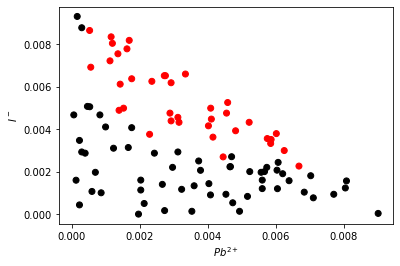

In [12]:
# Import matplotlib
import matplotlib.pyplot as plt

# Save x and y coordinates
x_coords = [point[0] for point in concentration_data]
y_coords = [point[1] for point in concentration_data]
colors = ['red' if point[2] == 1 else 'black' for point in concentration_data]

# Plot data
plt.scatter(x_coords, y_coords, c=colors)
plt.xlabel('$Pb^{2+}$')
plt.ylabel('$I^-$')
plt.show()

### Version 2:

Define a function that creates two lists of x and y coordinates. Plot them in separate lines of code with different colors.

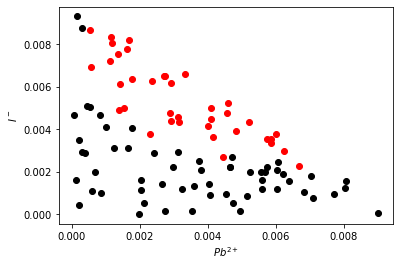

In [17]:
def separate_points(data):
    '''
    @param data : the data to separate
    @return x_1, y_1, x_2, y_2 : lists for different outcomes
    '''
    # Define lists
    x_1 = []
    y_1 = []
    x_2 = []
    y_2 = []

    # Iterate through data
    for element in data:

        # Conditional list separation
        if element[2] == 1:
            x_1.append(element[0])
            y_1.append(element[1])
        
        else:
            x_2.append(element[0])
            y_2.append(element[1])

    # Return lists
    return x_1, y_1, x_2, y_2

# Use function to separate lists
x_red, y_red, x_black, y_black = separate_points(concentration_data)

# Plot
plt.scatter(x_red, y_red, c='red')
plt.scatter(x_black, y_black, c='black')
plt.xlabel('$Pb^{2+}$')
plt.ylabel('$I^-$')
plt.show()

## Convert to Log-Concentrations

Now we need to convert from {[Pb], [I], outcome} to the constrained logarithmic form you explored in the pre-lab Exercise.

Write a function to perform the transformation for one entry, and then apply it to all the entries.  Save the results into the variable **log_data**.

### Code:

Warning: It is possible following will fail because one of the entries requires taking the logarithm of zero! This will likely cause an error:

In [18]:
# Import numpy
import numpy as np

def constrained_transform(data):
    '''
    Function to transform our data to fit one free parameter

    @param data : the data to transform
    @return data : transformed data
    '''
    # Iterate through data list
    new_data = []
    for element in data:

        # Transform
        element = [1 * np.log(element[0]) + 2 * np.log(element[1]), element[2]]
        new_data.append(element)

    # Return data
    return new_data

In [19]:
# Apply constrained transform to notebook
log_data = constrained_transform(concentration_data)

# Show data
log_data

/var/folders/p3/yqj3d7fs1n50f6vfb0qqlvj80000gn/T/ipykernel_64092/2744509035.py:16: RuntimeWarning: divide by zero encountered in log
  element = [1 * np.log(element[0]) + 2 * np.log(element[1]), element[2]]


[[-17.743484705450236, 0],
 [-17.086929367529294, 1],
 [-17.42855184875205, 1],
 [-18.635856125617398, 0],
 [-17.348523978914244, 0],
 [-16.70078004872042, 1],
 [-17.964272646669585, 0],
 [-16.091171165862963, 1],
 [-17.400054021066573, 0],
 [-16.265947424156085, 1],
 [-17.72770394827747, 0],
 [-16.418738360858995, 1],
 [-17.19452103379961, 1],
 [-17.1419324125593, 0],
 [-18.25074108298214, 0],
 [-19.763263068527245, 0],
 [-16.647895559699197, 1],
 [-15.994352647621849, 1],
 [-16.13437882338487, 1],
 [-17.60237042043841, 0],
 [-17.438872940984485, 0],
 [-18.109692882266703, 0],
 [-16.00801119030629, 1],
 [-17.901291889525886, 0],
 [-18.60866720494901, 0],
 [-18.56579678822189, 0],
 [-23.49083016558103, 0],
 [-17.21830656037006, 1],
 [-17.615008772550574, 0],
 [-16.553584718284647, 1],
 [-18.820031251060676, 0],
 [-21.80814496927523, 0],
 [-15.884397600999762, 1],
 [-16.745769721299368, 1],
 [-23.85104911795449, 0],
 [-inf, 0],
 [-18.060491980713838, 0],
 [-16.33058741245792, 1],
 [-16.

If you encounter this error, you can fix it by either manually removing the entry, or by writing a function that removes indeterminate values from the list.

In [41]:
def delete_cases(data):
    '''
    Function to remove error-inducing instances

    @param data : data list
    @param new_data : data with problems removed
    '''
    # New data list
    new_data = []

    # Iterate through data and only save valid cases
    for element in data:

        if element[0] != 0 and element[1] != 0:
            new_data.append(element)
        
        else:
            continue

    # Return new data
    return new_data

In [42]:
# Delete cases
trimmed_concentration_data = delete_cases(concentration_data)

# Apply constrained transform to notebook
log_data = constrained_transform(trimmed_concentration_data)

# Show data
log_data

[[-17.743484705450236, 0],
 [-17.086929367529294, 1],
 [-17.42855184875205, 1],
 [-18.635856125617398, 0],
 [-17.348523978914244, 0],
 [-16.70078004872042, 1],
 [-17.964272646669585, 0],
 [-16.091171165862963, 1],
 [-17.400054021066573, 0],
 [-16.265947424156085, 1],
 [-17.72770394827747, 0],
 [-16.418738360858995, 1],
 [-17.19452103379961, 1],
 [-17.1419324125593, 0],
 [-18.25074108298214, 0],
 [-19.763263068527245, 0],
 [-16.647895559699197, 1],
 [-15.994352647621849, 1],
 [-16.13437882338487, 1],
 [-17.60237042043841, 0],
 [-17.438872940984485, 0],
 [-18.109692882266703, 0],
 [-16.00801119030629, 1],
 [-17.901291889525886, 0],
 [-18.60866720494901, 0],
 [-18.56579678822189, 0],
 [-23.49083016558103, 0],
 [-17.21830656037006, 1],
 [-17.615008772550574, 0],
 [-16.553584718284647, 1],
 [-18.820031251060676, 0],
 [-21.80814496927523, 0],
 [-15.884397600999762, 1],
 [-16.745769721299368, 1],
 [-23.85104911795449, 0],
 [-18.060491980713838, 0],
 [-16.33058741245792, 1],
 [-16.556016985196

## Fit the Logistic Regression Model

Follow the example given in the pre-lab notebook:

1. Use statsmodels to fit the log_data values into a variable constrained_model.
2. Extract the parameters.
3. Normalize the extracted parameters
4. Compute *K*<sub>sp</sub> = *e*<sup>-fittedLogParam</sup> and save the result into a variable named Ksp.

### Code:

In [43]:
# Import logistic regression
import statsmodels.api as sm
import pandas as pd
import statsmodels.formula.api as smf

# Save data into dataframe
transformed_constrained_dataframe = pd.DataFrame(
    log_data,
    columns=['z', 'outcome']
)

# Define variables
X = transformed_constrained_dataframe['z']
X = sm.add_constant(X)
y = transformed_constrained_dataframe['outcome']

# Initialize model
model = sm.GLM(y, X, family=sm.families.Binomial())

# Fit model
result = model.fit()

In [44]:
# Save parameters
constrained_parameters = result.params

# Show parameters
constrained_parameters

const    187.116041
z         10.831921
dtype: float64

In [45]:
# Scale parameters
scaled_parameters = constrained_parameters / constrained_parameters[1]

# Save Ksp
Ksp = np.exp(-scaled_parameters[0])

# Show Ksp
Ksp

3.1461460721994116e-08

## Visualize your Results

1. Generate a plot of the equilibrium expression, *K*<sub>sp</sub> = [Pb][I]<sup>2</sup> (rearrange the expression so it is of the form [I] = ... and save the resulting plot into varibale equilibrium_plot).
2. Combine the equilibrium_plot with your previous concentration plot.

### Code:

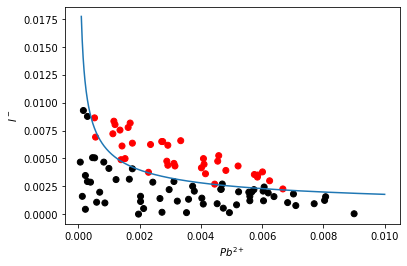

In [48]:
# Generate Ksp plot x and y
ksp_x = np.linspace(0.0001, 0.01, 1000)
ksp_y = np.sqrt(Ksp / ksp_x)

# Plot data
plt.plot(ksp_x, ksp_y)
plt.scatter(x_coords, y_coords, c=colors)   # See code above
plt.xlabel('$Pb^{2+}$')
plt.ylabel('$I^-$')
plt.show()

You can save the image above by hovering your cursor above the figure and clicking the save icon in the top right corner of the cell output.